# Exercise 2: Logistic  Regression

In this exercise, we will implement logistic regression to classify two different data sets.

## Students Admission

In our first example, we will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that we are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on the two exams and the admissions decision.

### Examining our Data

Let's examine the data:

In [1]:
data = load('data/ex2data1.txt');

In [2]:
data(1, :)

ans =

   34.62366   78.02469    0.00000



In [3]:
X = data(:, [1, 2]); 
y = data(:, 3);

Let's vizualize the data:

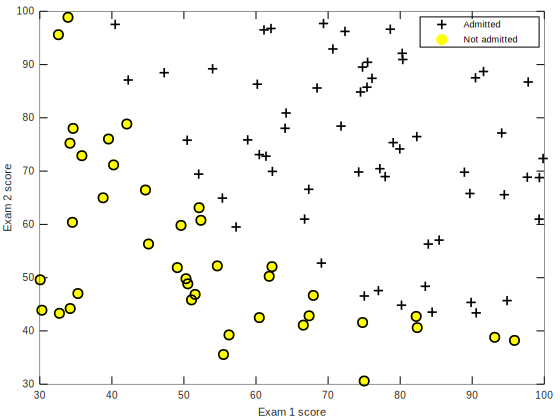

In [4]:
plot( X(y==1, 1), X(y==1, 2), 'k+', 'MarkerSize', 5, 
    X(y==0, 1), X(y==0, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5);
xlabel('Exam 1 score');
ylabel('Exam 2 score');
legend('Admitted', 'Not admitted');

### Logistic Regression Implementation

Before we start, let's implement a helper function, *sigmoid*, which computes $$ g(z) = \frac{1}{1 + e^{-z}} $$

In [5]:
function g = sigmoid(z)
%SIGMOID Compute sigmoid function
%   g = SIGMOID(z) computes the sigmoid of z.

    % The function should also work on scalar *and* matrix values 
    g = zeros(size(z));
    
    g = 1 ./ ( 1 + exp(-z));
end

In [6]:
sigmoid(0)

ans =  0.50000


In [7]:
sigmoid([-1, -0.5, 0; 0, 0.5, 1.0])

ans =

   0.26894   0.37754   0.50000
   0.50000   0.62246   0.73106



Let's plot our *sigmoid* function:

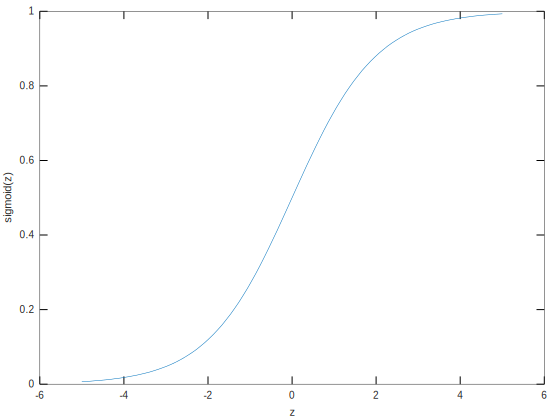

In [8]:
zvalues = linspace(-5, 5, 100);
plot(zvalues, sigmoid(zvalues));
xlabel('z');
ylabel('sigmoid(z)');

Now lets define our cost function 
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) ] $$ 
and its *gradient* vector, whose elements are defined by
$$ \frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}))-y^{(i)})*x^{(i)}, j = 0, 1,...,n $$
and 
$$ h_\theta(x) = \frac{1}{1 + e^{\theta^T x}} $$

In [9]:
function result = h(theta, x)
    result = (sigmoid(theta' * x'))';
end

In [10]:
function [J, grad] = costFunction(theta, X, y)
%COSTFUNCTION Compute cost and gradient for logistic regression
%   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
%   parameter for logistic regression and the gradient of the cost
%   w.r.t. to the parameters.

% Initialize some useful values
    m = length(y); 
    J = 0;
    grad = zeros(size(theta));
    % We can use matrix-vector multiplication to computer our sums
    sum1 = -log(h(theta, X))'*y - log(1-h(theta, X))'*(1-y);
    J = 1/m * sum1;
    % Again, the sum is computed using a matrix-vector mutliplication
    sum2 = X' * (h(theta, X) - y);
    grad = 1/m * sum2;  
end

In [11]:
%  Setup the data matrix appropriately, and add ones for the intercept term
X = data(:, [1, 2]); 
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


We now use *fminunc*, an optimization solver built into *Matlab* or *Octave* that finds the minimum of a function. For logistic regression, we want to optimize our cost function $ J(\theta) $ with parameters $ \theta $.


In [12]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


### Results

Let's vizualize our result and plot our data points and the decision boundary. In this case, for $ \theta = ( \theta_0, \theta_1, \theta_2) $ the decision boundary is defined as a line:

$$ y = - \frac{\theta_1}{\theta_2}x - \frac{\theta_0}{\theta_2} $$

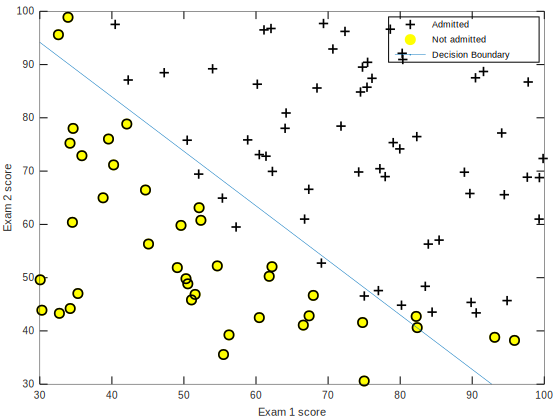

In [13]:
plot( X(y==1, 2), X(y==1, 3), 'k+', 'MarkerSize', 5, 
        X(y==0, 2), X(y==0, 3), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5);
hold on

% Only need 2 points to define a line, so choose two endpoints
plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

% Calculate the decision boundary line
plot_y = -theta(2)/theta(3) .* plot_x - theta(1)/theta(3);

% Plot, and adjust axes for better viewing
plot(plot_x, plot_y);
    
% Legend, specific for the exercise
xlabel('Exam 1 score');
ylabel('Exam 2 score');
legend('Admitted', 'Not admitted', 'Decision Boundary');
axis([30, 100, 30, 100]);
hold off

Let's test our results:

In [14]:
function p = predict(theta, X)
%PREDICT Predict whether the label is 0 or 1 using learned logistic 
%regression parameters theta
%   p = PREDICT(theta, X) computes the predictions for X using a 
%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m = size(X, 1); % Number of training examples
    p = zeros(m, 1);

    tmp = h(theta, X);
    p = tmp>=0.5;

end

In [15]:
prob = h(theta, [1, 45, 85]);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');
fprintf('\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0



## Regularized Logistic Regression

In this part we will work through another example. We will predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose we are the product manager of the factory and we have the test results for some microchips on two different tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. To help us make the decision, we have a dataset of test results on previously manufactored microchips, from which we can build a logistic regression model.

### Data Examination

Let's load and visualize our data:

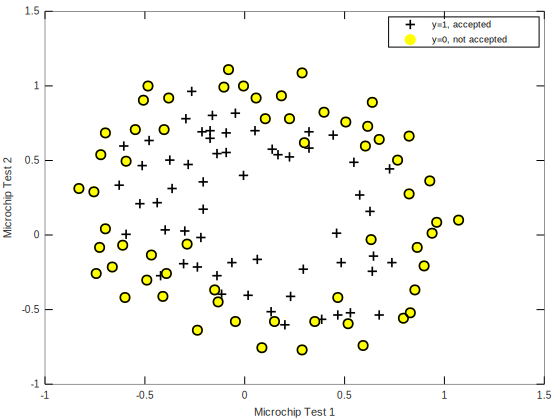

In [16]:
data = load('data/ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);
plot( X(y==1, 1), X(y==1, 2), 'k+', 'MarkerSize', 5, 
    X(y==0, 1), X(y==0, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5);
xlabel('Microchip Test 1');
ylabel('Microchip Test 2');
legend('y=1, accepted', 'y=0, not accepted');

This plot shows, that we cannot simply split our dataset into positive our negative examples by a simple linear boundary line.  

### Feature Mapping

One way to fit the data better is to create more features from each data point. We will implement a function *mapFeature* to map the features into all polynomial terms of $ x_1 $ and $ x_2 $ up to the sixth power:

$$ \begin{equation*} mapFeature(x_1, x_2) = \begin{pmatrix} 1\\ x_1\\ x_2\\ x_1^2 \\ x_1 x_2 \\ x_2^2 \\ x_1^3 \\ ... \\ x_1^5 x_2 \\ x_2^6 \\ \end{pmatrix} \end{equation*} $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the following, we will implement regularized logistic regression to fit the data and also see how regularization can help combat the overfitting problem.

In [17]:
function out = mapFeature(X1, X2)
% MAPFEATURE Feature mapping function to polynomial features
%
%   MAPFEATURE(X1, X2) maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
%

    degree = 6;
    out = ones(size(X1(:,1)));
    for i = 1:degree
        for j = 0:i
            % 'end' here stands for the last index in the matrix
            out(:, end+1) = (X1.^(i-j)).*(X2.^j);
        end
    end

end

In [18]:
X = mapFeature(X(:,1), X(:,2));

In [19]:
size(X)

ans =

   118    28



### Implementation

Regularized logistic regression differs from the approach used in our first example, because we use a modified cost function $ J(\theta) $. We add a *regularization term* $ \frac{\lambda}{2m} \sum_{i=1}^{n} \theta_i^2 $ to our cost function as follows:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) ] + \frac{\lambda}{2m} \sum_{i=1}^{n} \theta_i^2 $$ 
and its *gradient* vector, whose elements are defined by
$$ \frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}))-y^{(i)})*x^{(i)}, j = 0 $$
and $$
\frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}))-y^{(i)})*x^{(i)} + \frac{\lambda}{m} \theta_j, j = 1,...,n $$
$ h_\theta(x) $ remains unchanged: 
$$ h_\theta(x) = \frac{1}{1 + e^{\theta^T x}} $$

In [20]:
function [J, grad] = costFunctionReg(theta, X, y, lambda)
%COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
%   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

    % Initialize some useful values
    m = length(y); % number of training examples
    J = 0;
    grad = zeros(size(theta));

    % We can use matrix-vector multiplication to computer our sums
    sum1 = -log(h(theta, X))'*y - log(1-h(theta, X))'*(1-y) ;
    % Special case: don't regularize theta(1), therefore only use theta(2:end)
    reg1 = theta(2:end)'*theta(2:end);
    
    J = 1/m * sum1 + 0.5 * lambda/m * reg1;

    % Again, the sums for the gradient is computed using a matrix-vector mutliplication
    sum2 = X' * (h(theta, X) - y);
    reg2 = lambda/m * theta;
    % Special case: don't regularize theta(1)
    reg2(1) = 0;
    grad = 1/m * sum2 + reg2;
end

In [21]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [22]:
test_theta = ones(size(X,2),1);
[cost, grad] = costFunctionReg(test_theta, X, y, 10);

fprintf('Cost at test theta (with lambda = 10): %f\n', cost);
fprintf('Expected cost (approx): 3.16\n');
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.346045 
 0.161352 
 0.194796 
 0.226863 
 0.092186 
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


### The Effect of Regularization

Let's try different values for $ \lambda $.


In [23]:
function trainAndPlotDecisionBoundary(X, y, lambda)

    % Initialize fitting parameters
    initial_theta = zeros(size(X, 2), 1);

    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 400);

    % Optimize
    [theta, J, exit_flag] = ...
        fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

    % Plot Boundary
    plot( X(y==1, 2), X(y==1, 3), 'k+', 'MarkerSize', 5, 
        X(y==0, 2), X(y==0, 3), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 5);
    hold on;
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
    title(sprintf('lambda = %g', lambda))

    % Labels and Legend
    xlabel('Microchip Test 1')
    ylabel('Microchip Test 2')

    legend('y = 1', 'y = 0', 'Decision boundary')
    hold off;

    % Compute accuracy on our training set
    p = predict(theta, X);

    fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
    fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');
end

With $ \lambda = 1 $ we get a descent result:

Train Accuracy: 83.050847
Expected accuracy (with lambda = 1): 83.1 (approx)


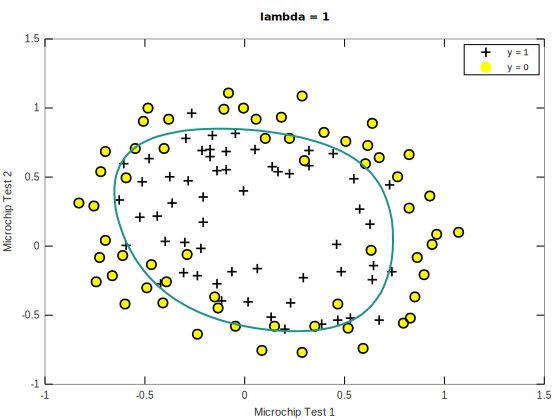

In [24]:
trainAndPlotDecisionBoundary(X, y, 1.0);

With $ \lambda = 0 $ we do not apply regularization. This results in overfitting our decision boundary.

Train Accuracy: 86.440678
Expected accuracy (with lambda = 1): 83.1 (approx)


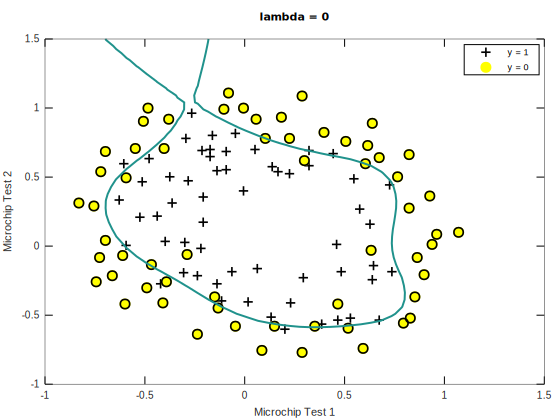

In [25]:
trainAndPlotDecisionBoundary(X, y, 0.0);

With $ \lambda = 10 $ (or even larger), we are underfitting our decision boundaries.

Train Accuracy: 74.576271
Expected accuracy (with lambda = 1): 83.1 (approx)


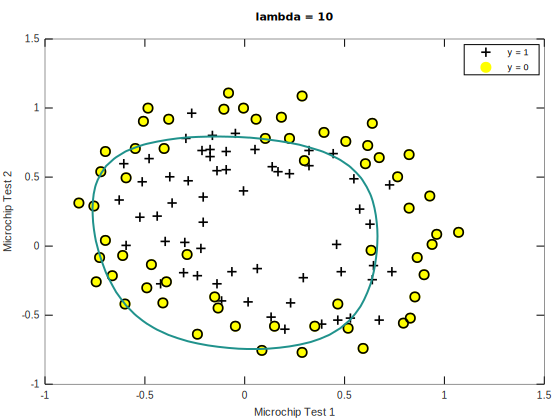

In [26]:
trainAndPlotDecisionBoundary(X, y, 10.0);

Train Accuracy: 61.016949
Expected accuracy (with lambda = 1): 83.1 (approx)


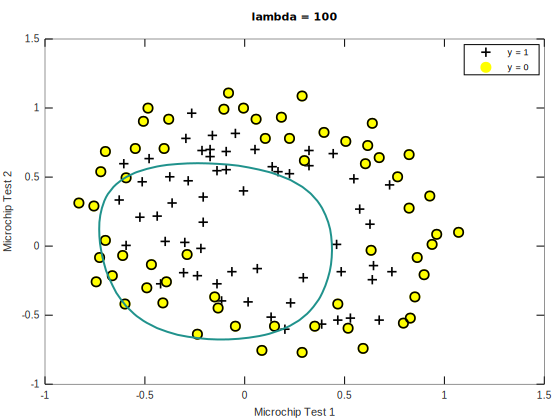

In [27]:
trainAndPlotDecisionBoundary(X, y, 100.0);